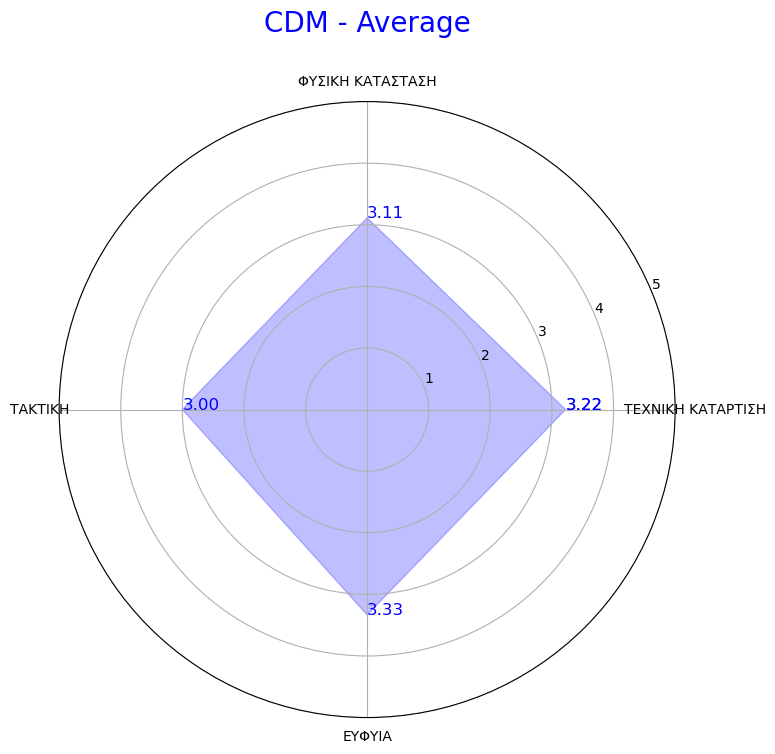

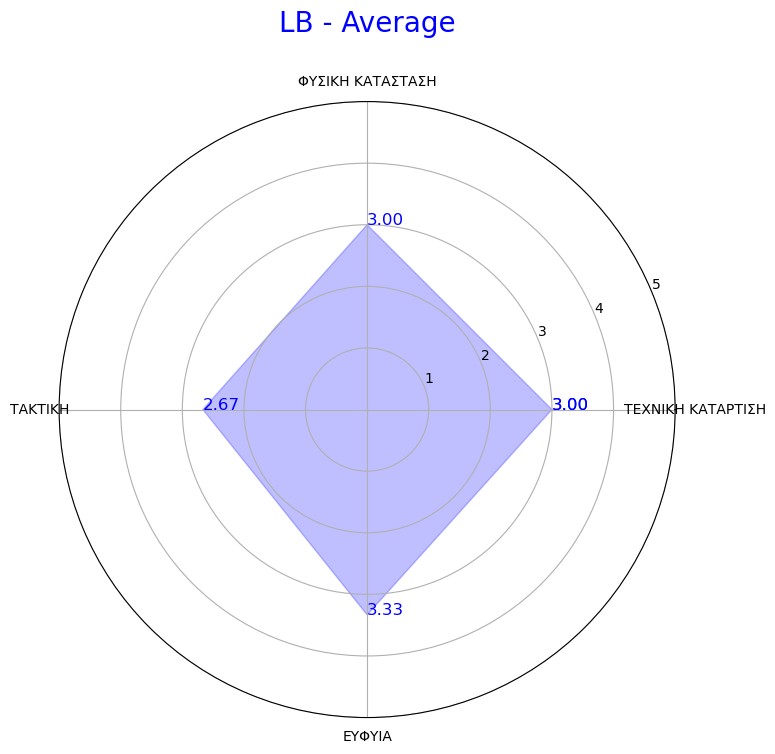

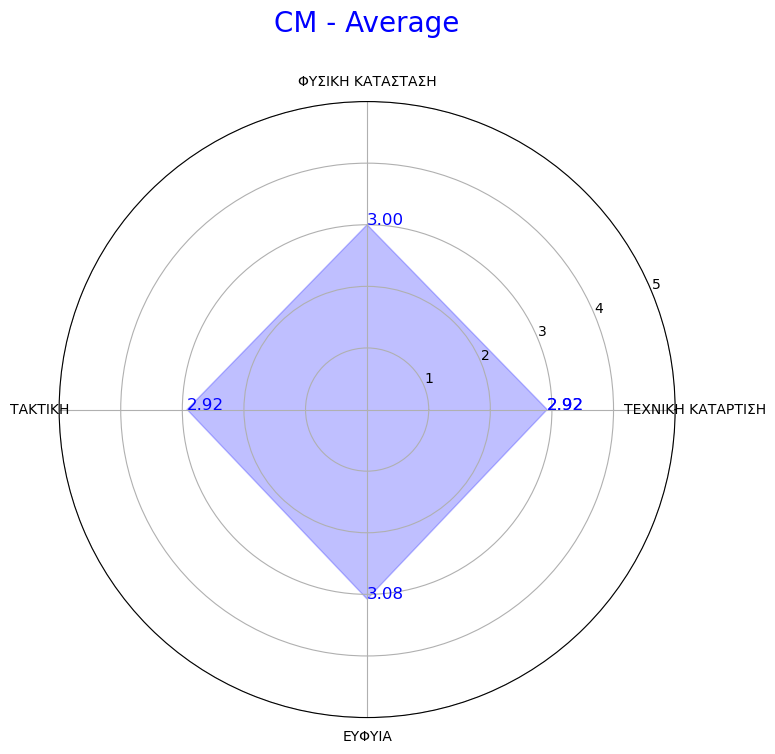

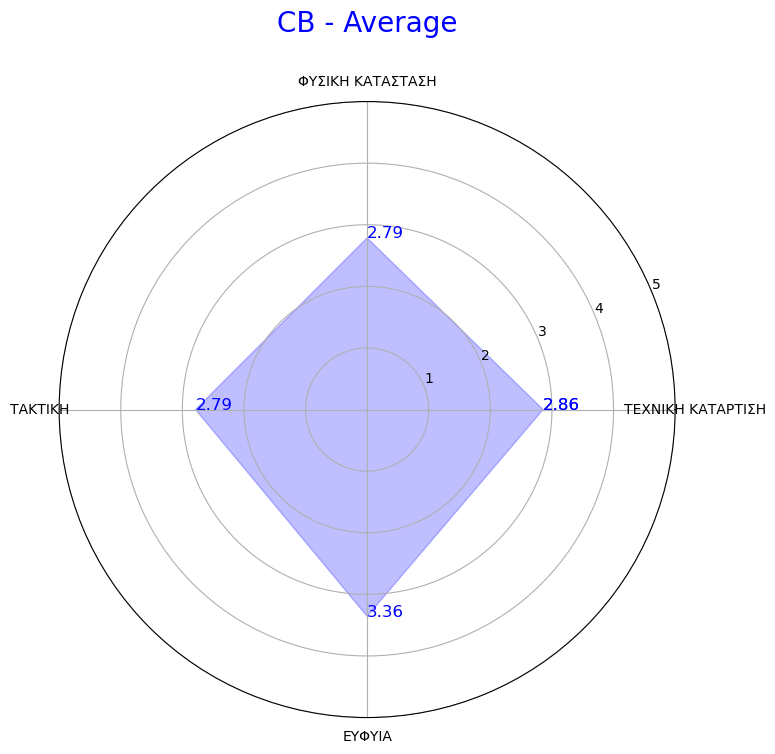

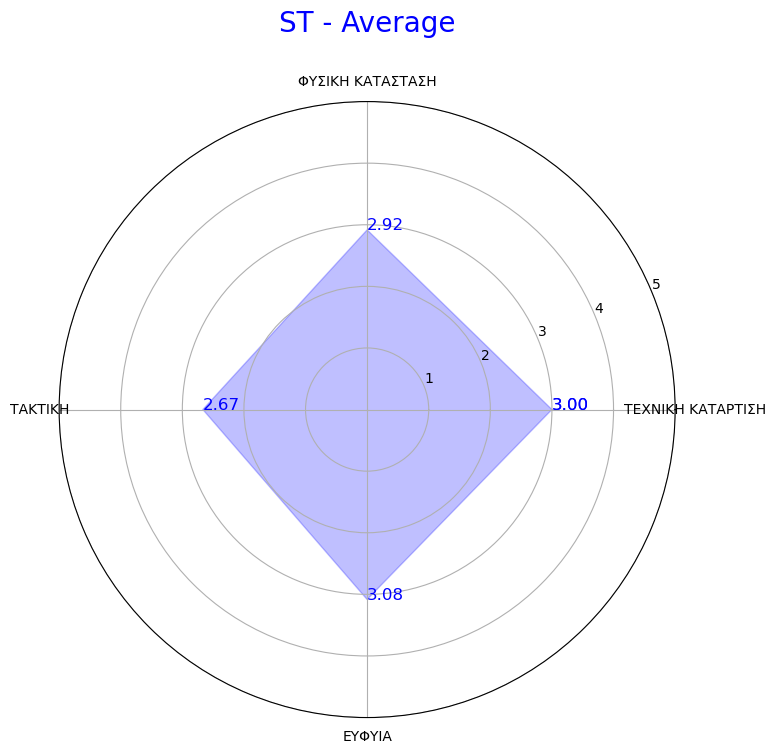

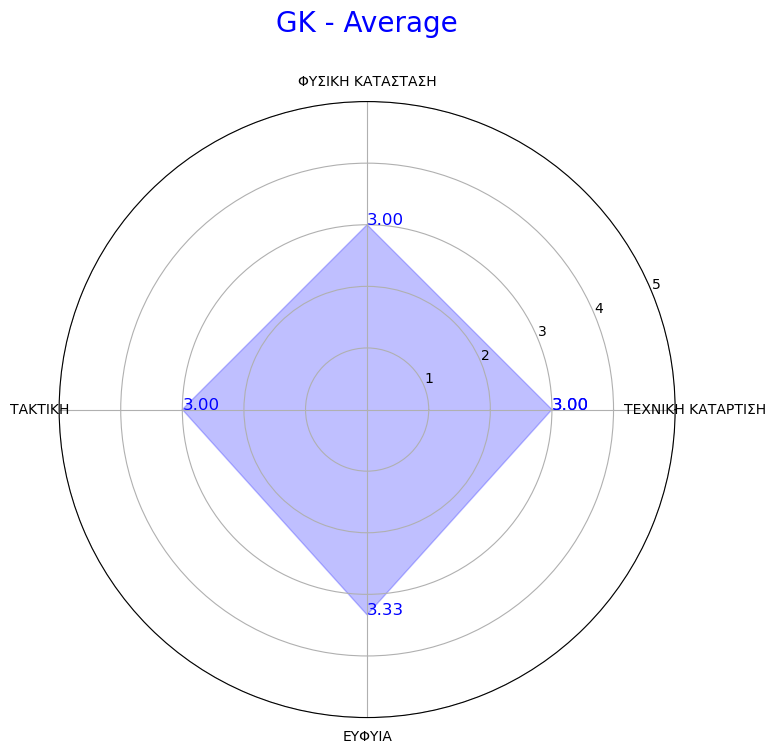

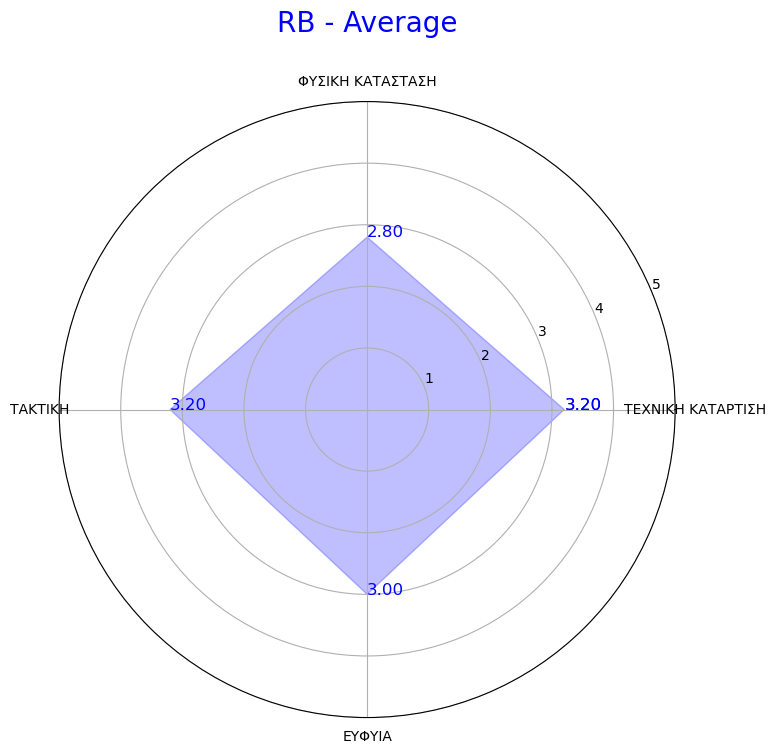

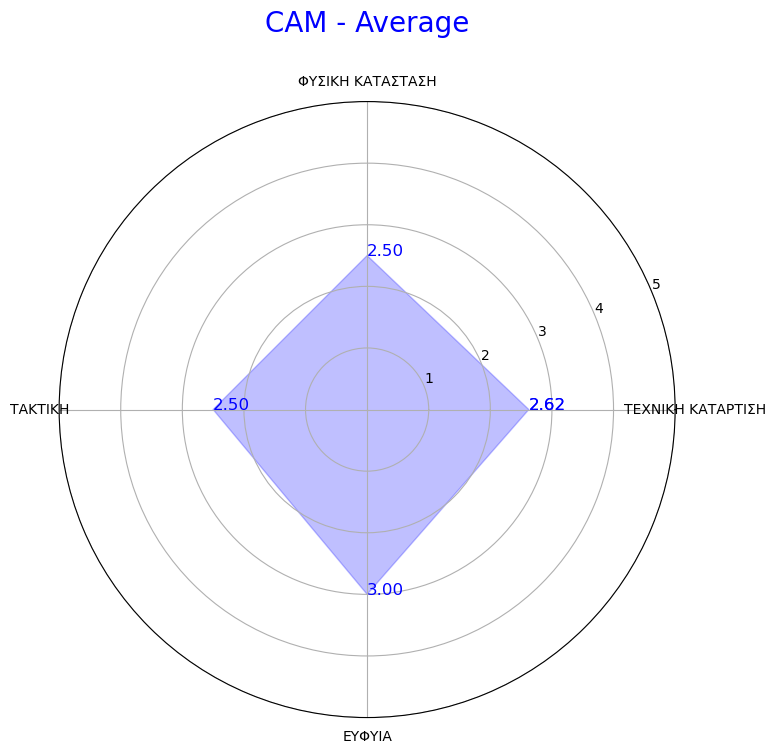

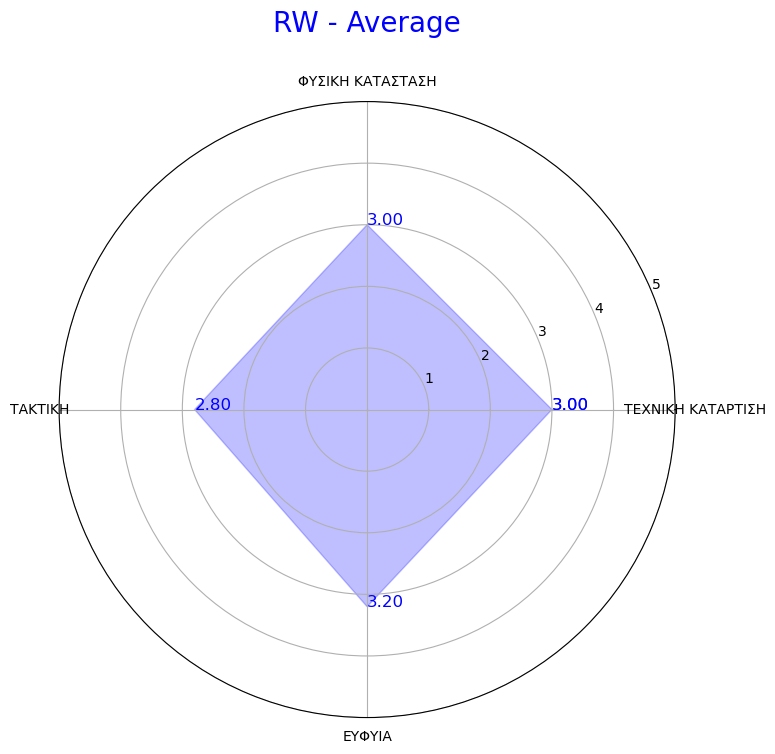

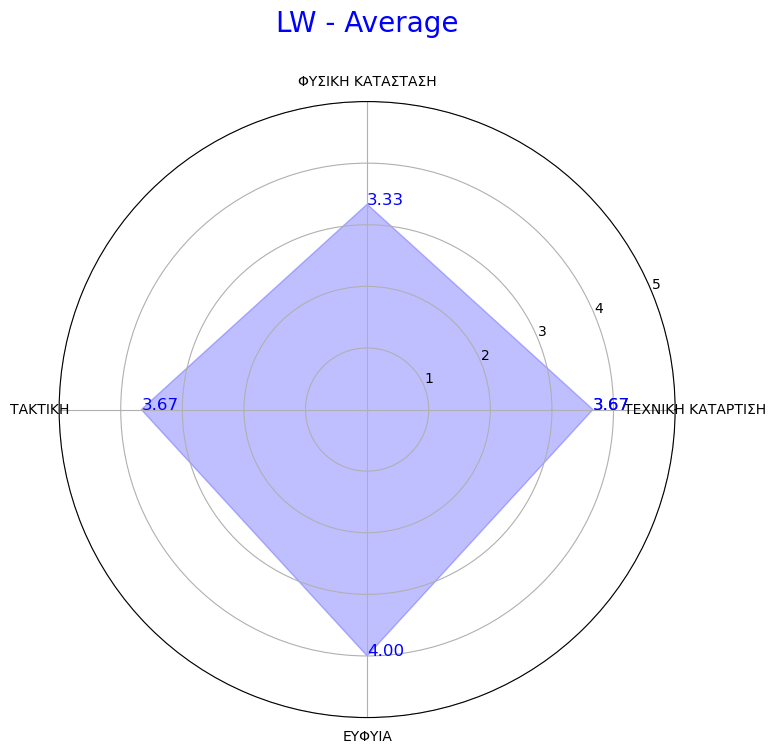

In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import pi

def create_average_radar_chart(position, players_data, attributes, save_path):
    # Number of attributes
    num_attributes = len(attributes)

    # Compute angle of each axis
    angles = np.linspace(0, 2 * np.pi, num_attributes, endpoint=False).tolist()

    # Calculate the average values for each attribute
    average_values = np.mean(players_data, axis=0)

    # Check for NaN or infinite values
    if np.isnan(average_values).any() or np.isinf(average_values).any():
        print("Warning: NaN or infinite values found in average_values.")
        return

    # The plot is circular, so we need to "close the loop" by adding the starting data point at the end
    average_values = np.append(average_values, average_values[0])
    angles += angles[:1]

    # Ensure the directory in the file path exists
    directory = os.path.dirname(save_path)
    if not os.path.exists(directory):
        os.makedirs(directory)

    # Create the radar chart with average values
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
    ax.fill(angles, average_values, color='b', alpha=0.25)

    # Set the labels for each attribute
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(attributes)

    # Set the radial axis ticks
    ax.set_yticks([1, 2, 3, 4, 5])
    ax.set_yticklabels([1, 2, 3, 4, 5])

    # Add data labels on the chart
    for i, (angle, value) in enumerate(zip(angles, average_values)):
        ax.text(angle, value, f'{value:.2f}', color='blue', fontsize=12)

    # Add a title with the position and average
    plt.title(f"{position} - Average", size=20, color='blue', y=1.1)

    # Save the radar chart as JPEG without cropping any letters
    plt.savefig(save_path, bbox_inches='tight', dpi=300)

    # Show the radar chart
    plt.show()

# Load the Excel file
file_path = "C:\\Users\\anton\\Desktop\\scouting National team\\K-16\\RADAR MAP DATA.xlsx"
df = pd.read_excel(file_path)

# Extract the common attributes for all players
common_attributes = ['ΤΕΧΝΙΚΗ ΚΑΤΑΡΤΙΣΗ', 'ΦΥΣΙΚΗ ΚΑΤΑΣΤΑΣΗ', 'ΤΑΚΤΙΚΗ', 'ΕΥΦΥIΑ']

# Display available columns and check for correct column names
for attribute in common_attributes:
    if attribute not in df.columns:
        print(f"Warning: Column '{attribute}' not found in DataFrame.")

# Get a list of unique positions
positions = df['ΘΕΣΗ'].unique()

# Compare players in each position and create average radar charts
for position in positions:
    position_attributes = df.loc[df['ΘΕΣΗ'] == position, common_attributes]
    players_data = position_attributes[common_attributes].values
    position_save_path = f"C:\\Users\\anton\\Desktop\\scouting National team\\K-16\\RadarCharts\\{position}_average_radar_chart.jpg"
    create_average_radar_chart(position, players_data, common_attributes, position_save_path)
